# 모듈 불러오기

In [9]:
# !conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

import scipy
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE

import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import os 
import glob
import itertools
from copy import deepcopy
from sklearn.model_selection import KFold

import datetime

from dataloader import *

from model_distribution import *

# Train

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

conv1d_dim1 = 32
conv1d_dim2 = 64
conv1d_dim3 = 128
dense_dim = 256

learning_rate = 0.001
n_epochs = 2000

criterion_distribution = nn.GaussianNLLLoss()

In [12]:
# 경로 입력 및 아이디 추출

file_path = "./data/total/"
data_path = glob.glob(file_path + '*')
name = []
for file_name in data_path:
    folder_name = os.path.split(file_name)[1][:7]
    name += [folder_name]
    
id_name = np.unique(name)

In [13]:
id_name

array(['IF00017', 'IF00024', 'IF00034', 'IF00041', 'IF01020', 'IF01045',
       'IF01047', 'IF02035', 'IF03014', 'IF03027', 'IF03039', 'IF94031',
       'IF99008', 'IF99013', 'IF99030', 'IF99032', 'IM01006', 'IM01029',
       'IM02040', 'IM03011', 'IM03048', 'IM96018', 'IM96033', 'IM97015',
       'IM98009', 'IM98019', 'IM98026', 'IM98036', 'IM98042', 'IM98049',
       'IM98050', 'IM99007', 'IM99010', 'IM99012', 'IM99021', 'IM99025',
       'IM99037'], dtype='<U7')

In [14]:
test_id = np.array(['IF03014', 'IF00041', 'IM02040', 'IM98049'])
# test_id = np.array(['IF03014', 'IF00041', 'IM02040', 'IM98042'])

# Visualize

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

test_file_path = "./data/total/"

test_dataset_R = Gait_Dataset_Salted(test_file_path, test_id, right=True)
test_dataset_L = Gait_Dataset_Salted(test_file_path, test_id, right=False)

test_dataset = torch.utils.data.ConcatDataset([test_dataset_R, test_dataset_L])

test_loader = torch.utils.data.DataLoader(test_dataset,
                                       batch_size=len(test_dataset),
                                       shuffle=False,
                                       worker_init_fn=np.random.seed(42))

Training started at: 2024-11-04 16:21:15.998338
./model/L2/L2_fold8.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold7.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold9.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold5.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold1.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold3.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold10.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold2.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold4.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
./model/L2/L2_fold6.pth


/tmp/ipykernel_45823/2295640144.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


FP32 Model Size: 167518.10 KB
INT8 Quantized Model Size: 44641.60 KB
Size Reduction: 73.35%
MAE : 6.0852, MAPE : 95.59%, RMSE : 7.7403, RSE : 0.1190


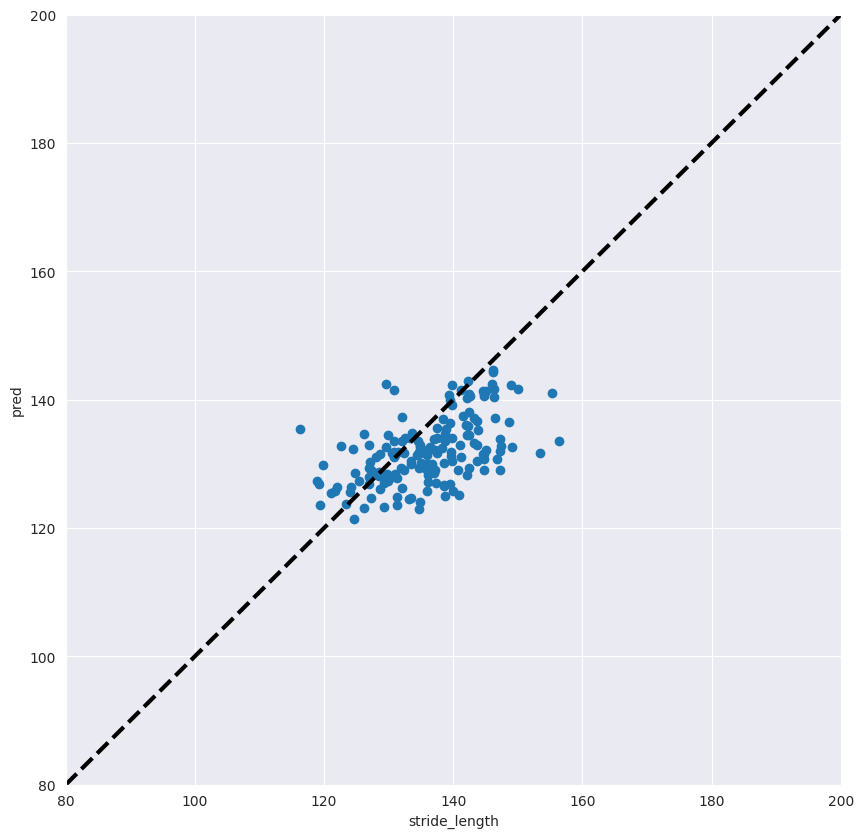

Training ended at: 2024-11-04 16:21:30.414991
Total training time: 0:00:14.416653


In [16]:
### Scatter Plot 
import torch.quantization

conv1d_dim1 = 32
conv1d_dim2 = 64
conv1d_dim3 = 128
dense_dim = 256

stride_length_list = pd.DataFrame()
sigma_list = pd.DataFrame()
tot_val_MAE = 0
tot_val_MAPE = 0

start_time = datetime.datetime.now()
print(f"Training started at: {start_time}")

for fold_idx, model_name in enumerate(glob.glob('./model/L2/L2_fold' + '*')):
    print(model_name)
    model = Encoder(conv1d_dim1, conv1d_dim2, conv1d_dim3, dense_dim)
    model.load_state_dict(torch.load(model_name))
    
    torch.save(model.state_dict(), "model_fp32.pth")
    fp32_size = os.path.getsize("model_fp32.pth") / 1024  # KB 단위로 크기 확인

    
    model_int8 = torch.quantization.quantize_dynamic(
    model, {nn.Conv1d, nn.Linear}, dtype=torch.qint8
)
    
    # 양자화 후 모델 크기 측정
    torch.save(model_int8.state_dict(), "model_int8.pth")
    int8_size = os.path.getsize("model_int8.pth") / 1024  # KB 단위로 크기 확인
    
    # 결과 출력
    print(f"FP32 Model Size: {fp32_size:.2f} KB")
    print(f"INT8 Quantized Model Size: {int8_size:.2f} KB")
    print(f"Size Reduction: {((fp32_size - int8_size) / fp32_size) * 100:.2f}%")
    
    model = model_int8
    
    model.eval()
    pred_list = []
    for i, data in enumerate(test_loader):
        inputs_acc, inputs_gyr, inputs_prs, stride_length, mu, sigma, folder_id = data
        inputs_acc, inputs_gyr, inputs_prs, stride_length = inputs_acc.float(), inputs_gyr.float(), inputs_prs.float(), stride_length.float() 
        inputs_acc, inputs_gyr, inputs_prs = inputs_acc, inputs_gyr, inputs_prs

        stride_length = stride_length.reshape(-1, 1)
        stride_length = stride_length

        outputs = model(inputs_acc, inputs_gyr, inputs_prs)
        stride_length_list.loc[:, fold_idx] = outputs[0].reshape(-1).cpu().detach().numpy()
        sigma_list.loc[:, fold_idx] = outputs[1].reshape(-1).cpu().detach().numpy()
        
pred = stride_length_list.mean(axis=1)
stride_length = stride_length.reshape(-1).cpu().detach().numpy()
# stride_length = stride_length.reshape(-1)

mu = mu.cpu().detach().numpy()
# mu = mu

# print(pred)
# print(stride_length_list)
MAE = np.sum(np.abs(pred - stride_length)) / len(stride_length)
MAPE = 100 - (np.mean(np.abs(pred - stride_length) / stride_length) * 100)
RMSE = np.sqrt(np.mean((stride_length - pred)**2))
RSE = RMSE / np.sqrt(np.sum((stride_length - mu)**2))


print('MAE : {:.4f}, MAPE : {:.2f}%, RMSE : {:.4f}, RSE : {:.4f}'.format(MAE, MAPE, RMSE, RSE))
# print('MAE : {:.4f}'.format(MAE))

plt.figure(figsize=(10, 10))
plt.scatter(stride_length, pred)
plt.xlim([80, 200])
plt.xlabel('stride_length')
plt.ylim([80, 200])
plt.ylabel('pred')

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

plt.show()

end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print(f"Training ended at: {end_time}")
print(f"Total training time: {elapsed_time}")